<a href="https://colab.research.google.com/github/nhattruong1302/Azure-Data-Science/blob/main/Truong_Dinh_Airlines_Price_Oct23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/data/Flight_Booking - Flight_Booking.csv'

### I. Essential Libraries

In [ ]:
# Download basic library for data ingestion, transformation, and exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

### II. Read and review the data

In [ ]:
# Ingest data
data=pd.read_csv(path)

# and show a peak of the data
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


The first column contains the row index of the data table, which can be removed

In [ ]:
# drop the first column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Overview of the data size, type, and its null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Observation:
1. There are **300,153 observations** in the dataset with 11 features, of which only 3 are numerical variables. Among categorical variables, the flight feature, which contained the flight code on each route, could be removed since it represents the code for the route and time combinations.
<br>
<br>
2. We can create new features to extract more information from data and shift the lens when looking at the data. Potential features, namely:
    + **Route**: the combination of Source City and Destination city
    + **Route_type**:
        + Long haul/short haul: using 'Duration'
        + Trunk/Mix_purpose/tourist route: using route volumes, city economic information, and traveling purpose
    + **Flight_time**: the combination of Departure Time and Arrival Time
    + **Average price by days left**

<br>

### III. Exploratory Data Analysis (EDA)

#### 1.. Numerical Features

In [ ]:
# Create a list of column names that are numerical features
numericals=data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f'The list include: {numericals}')
print(f'Its data type is: {type(numericals)}')

The list include: ['duration', 'days_left', 'price']
Its data type is: <class 'list'>


##### 1.1. Univariate Analysis

In [ ]:
# Create a function to generate statistical analysis of the numerical features
def univariate_numericals(data, numericals):

    # Skew score analysis
    def skewscore(score):
        if score < -0.5:
            return ' => Left Skew'
        elif score < 0.5:
            return ' => Symestric'
        else:
            return ' => Right Skew'

    # Distribution score analysis
    def kurtscore(score):
        if score > 3.1:
            return ' => Leptokurtic'
        elif score < 2.9:
            return ' => Platykurtic'
        else:
            return ' => Mesokurtic'

    # Calculate Skew, Distribution score and return results
    for i in numericals:
        print(f'Feature name: **** {i.upper()} **** \n')
        print('1. Statistic information:')
        print(data[i].describe())
        print('\n2. Distribution and desity:')
        fig, axes=plt.subplots(2,1,figsize=(8,4))
        sns.histplot(x=i, data=data, kde=True, ax=axes[0], bins=10, color='cyan').lines[0].set_color('red')
        sns.boxplot(x=i, data=data, showmeans=True, color='aquamarine', linecolor='teal')
        plt.show()
        print('3. Skewness: ', round(data[i].skew(),2), skewscore(data[i].skew()))
        print('\n4. Kurtosis', round(data[i].kurt(),2), kurtscore(data[i].kurt()))
        print('\n\n======================================================================================\n\n\n')

Feature name: **** DURATION **** 

1. Statistic information:
count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

2. Distribution and desity:


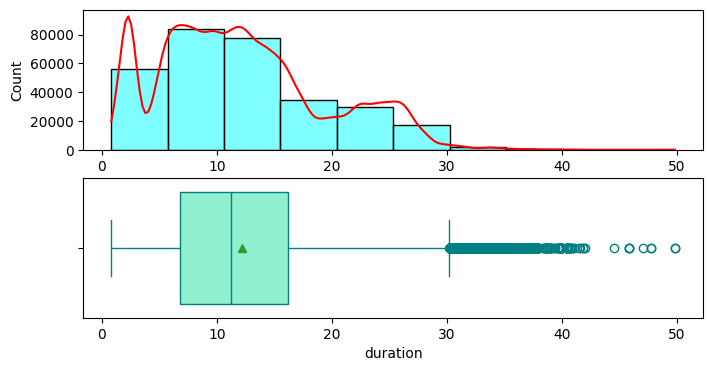

3. Skewness:  0.6  => Right Skew

4. Kurtosis -0.27  => Platykurtic





Feature name: **** DAYS_LEFT **** 

1. Statistic information:
count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

2. Distribution and desity:


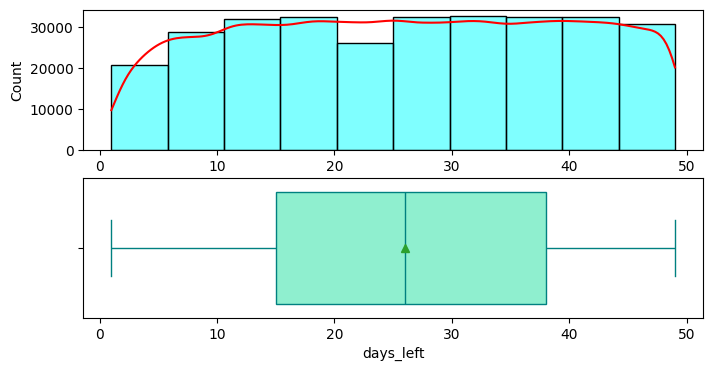

3. Skewness:  -0.04  => Symestric

4. Kurtosis -1.16  => Platykurtic





Feature name: **** PRICE **** 

1. Statistic information:
count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

2. Distribution and desity:


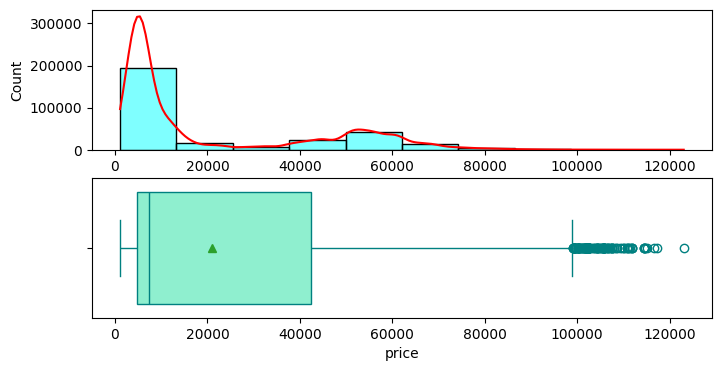

3. Skewness:  1.06  => Right Skew

4. Kurtosis -0.4  => Platykurtic







In [ ]:
# Univariate analysis for numerical features
univariate_numericals(data, numericals)

Observations:
+ The flight duration spread widely from 0.83 hours to approximately 50 hours, while most of the flights in the dataset were domestic flights. This could be because the duration data included delay time, and it added up the time if the flights got canceled and moved to another day. The price would not be impacted under this situation since the traveler won't know if the flight is going to be canceled or delayed at the time they purchase the ticket, and neither does the Airline Pricing team. For this reason, we can drop this feature while building the model.
<br>
<br>
+ Seats were opened for sale 50 days before the departure days. The distribution was uniform, which indicated that this was the market norm, and all of the airlines were doing that. As the days left reduced, the average price would increase since there were fewer seats available for sale.
<br>
<br>
+ The seat prices distribution peaked at around 10,000 and 50,000 rupees, which indicates that there were two market segments, which are Economy and Business class. Each market segment served different customer groups. Hence they would have different pricing practices and booking behaviours. It would be more appropriate to separate data by each segment and develop a customized prediction model for each segment.

##### 1.2. Bivariate Analysis

In [ ]:
# Create a function to plot pairs of features and the target feature
def bivariate_numericals(data, numerical, target):
    """
        numerics: list of names of numerical features
        target: the name of target feature
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) # adjust the number of subplot rows or columns
    for feature, pos in zip(numerical, axes):
        sns.scatterplot(data, x=feature, y=target, ax=pos, color='teal', alpha=0.3)
    # fig.delaxes(axes[1,2]) # Delete unused axes
    plt.show()

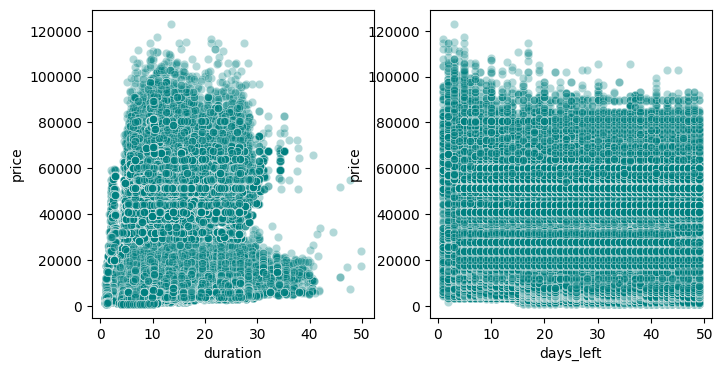

In [ ]:
# Bivariate analysis for numerical features and target values
bivariate_numericals(data, ['duration', 'days_left'], 'price')

Observation:
+ The price is distributed equally within the range from 0 to 30 hours. This confirms the earlier assumption that the duration is inflated with delay time and cancel flight. The range from the 30s to above implied that cheap flights had a high chance of delay or cancellation.
+ The price distribution seems uniform by days left, which counters the expectation to have the price increase as days left decrease. This phenomenon advocates the assumption there are multiple segments in the dataset that could be divided by Economy and Business class. Later in the report, I will separate the price by ticket class to learn about their relative price distribution.

<Axes: >

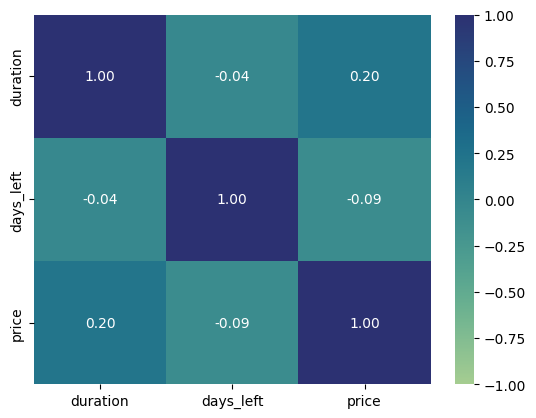

In [ ]:
# Analyze the correlation between numerical features
sns.heatmap(data[numericals].corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='crest')

Observation:
+ There is a negative correlation between 'days left' and 'price, and a positive correlation between 'duration' and 'price.' However, these relations are not strong.

#### 2.. Categorical Feature

In [ ]:
# Create a list of categorical features
categoricals=data.select_dtypes(include='object').columns.tolist()

# drop the 'flight' feature, b/c this feature doesn't hold helpful information as discuss before
categoricals.remove('flight')

print(f'The list include: {categoricals}')
print(f'Its data type is: {type(categoricals)}')

The list include: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Its data type is: <class 'list'>


##### 2.1. Univariate analysis

In [ ]:
# define a function to visualize the value counts of categorical features
def univariate_categorical(data, categoricals, nrows, ncols):
    """
        categorical: a list of name of categorical features
        nrows: number of subplot rows
        ncols: number of subplot cols
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(15,20))
    for ax, col in zip(axes.flatten(), categoricals):
        sns.barplot(data[col].value_counts(), ax = ax, errorbar=None, color='aquamarine', edgecolor='teal')
        ax.set_title(col, fontdict={'fontsize':17, 'fontweight':'bold', 'color':'darkgreen'})
        ax.set_ylabel('')
    fig.delaxes(axes[3,1]) # remove unused axes
    plt.show()

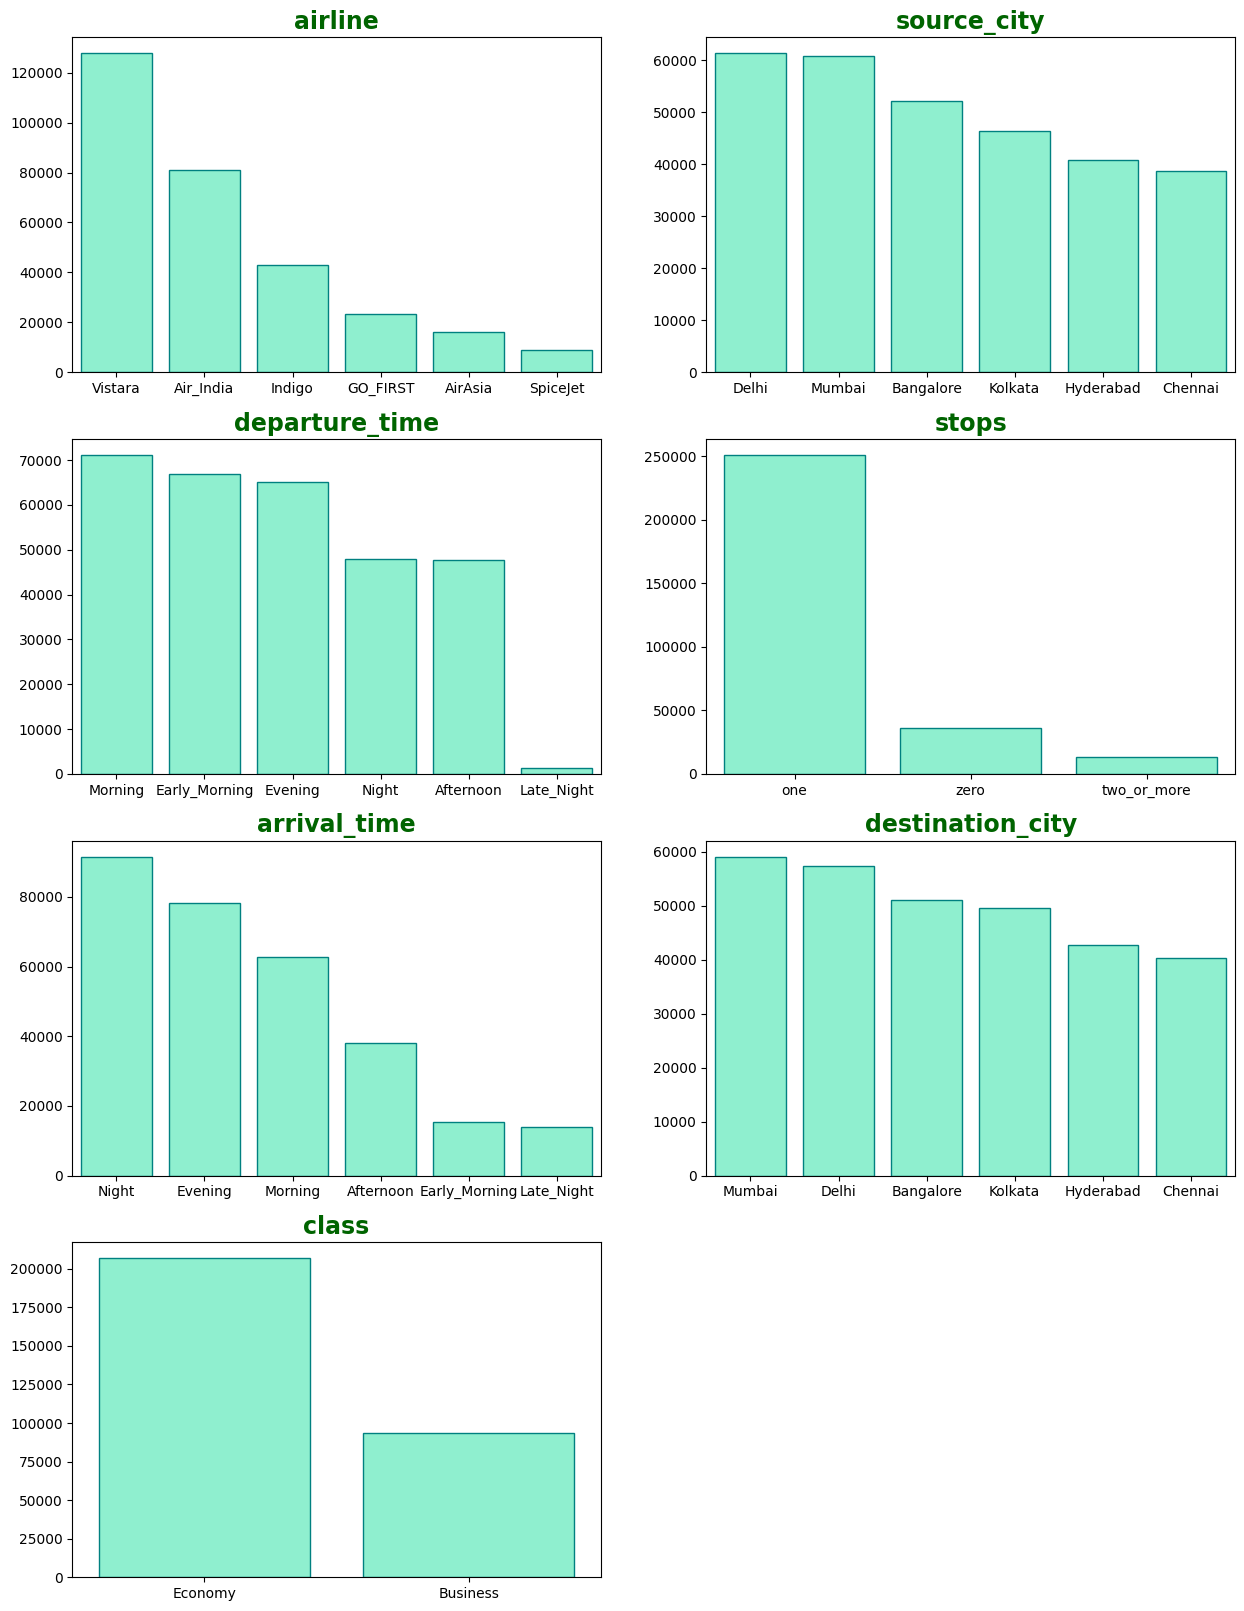

In [ ]:
univariate_categorical(data, categoricals, 4, 2)

**Observation**:
+ Vistara and Air India were major airline services in the Indian market. Other service providers included Indigo, Go-First, AirAsia, and Spicejet.
+ Delhi and Mumbai were the main airline markets with high volumes. The routes between the two markets could be classified as Trunk routes. Chennai is a tourism destination, so any route that links to Chennai could be considered a tourism route. Other combinations of the two cities will be considered as Mix-purpose routes.
+ Most of the flights start in the early morning and end in the evening. This makes sense since these airlines want to optimize aircraft utilization. There were only a few flights that started late at night.
+ The economy segment made up 65% of the air travel volume of the market.

<br>

##### 2.2. Bivariate analysis

Note: As we learned earlier, the price followed power law distribution, which makes it difficult to visualize it against categorical features. I will apply the logarithm to transform it.

###### 2.2.1. Applied Log transformation to price

In [ ]:
# Create kde plots to compare the Price density before and after Log transformation
def plot_before_after_log(data, target, hue):
    """
        data <dataframe>: the data frame, including target and hue features
        target <string>: the column name of target feature
        hue <string>: the column name of hue feature
    """
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
    fig.suptitle(f'{target.capitalize()} by {hue.capitalize()}')
    # Original Target
    sns.kdeplot(data, x=target, hue=hue, ax=axes[0], fill=True, palette='hls')
    axes[0].set_title(f'Original {target.capitalize()}')
    axes[0].set_xlabel(f'{target.capitalize()}')
    # Target with Log transformation
    dumdata=data.copy()
    dumdata[target] = np.log(dumdata[target])
    sns.kdeplot(dumdata, x=target, hue=hue, ax=axes[1], fill=True, palette='hls',
                legend=None, )
    axes[1].set_title(f'{target.capitalize()} Applied Log Transformation')
    axes[1].set_ylabel('')
    axes[1].set_xlabel(f'Log of {target.capitalize()}')
    plt.show()

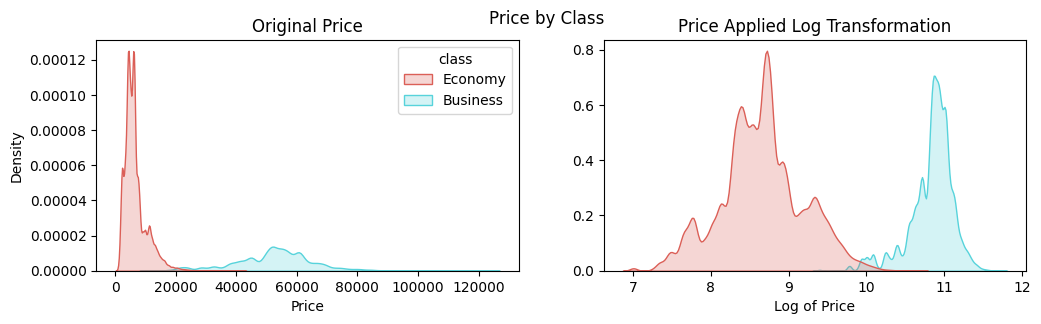

In [ ]:
plot_before_after_log(data, 'price', 'class')

###### 2.2.2.Class vs Price Analysis

In [ ]:
def bivariate_categorical(data, categoricals, target, hue, log_transform = False, kde=False, height=None):
    """
        data <data frame>: includes categorical, target, and hue features
        categoricals <list>: list of column name of features
        target <string>: the column name of target feature
        hue <string>: the column name of hue feature
        log_transform <boolean>: to apply log transformation or not
    """
    # Apply Log transformation to the data
    dumdata=data.copy()
    if log_transform == True:
        dumdata[target] = np.log(dumdata[target])
    # set up the palette
    palette='pastel' #{'Economy':'aquamarine', 'Business':'yellow'}

    # get unique classes from hue
    classes=dumdata[hue].unique()

    # Plot multiple graphs for each feature in categorical feature list
    for feature in categoricals:
        if height == None:
          height = len(data[feature].unique())
        print(f'Feature name: {feature.upper()}')
        plt.figure(figsize = (12,height))
        # Boxplot
        sns.boxplot(data=dumdata, x=target, y=hue, hue=feature,
                   palette=palette, linecolor='teal')
        plt.title(f"{target.capitalize()} breakdown by {feature.capitalize()}")
        plt.legend(loc='upper left')
        plt.show()

        # Create a KDE plot for each unique classes
        if kde == True:
          for name in classes:
              plt.figure(figsize=(12,3))
              sns.kdeplot(dumdata[dumdata[hue]==name], x=target, hue=feature, alpha=0.5,
                          fill=True, palette='hls')
              plt.title(f'{name.capitalize()}')
              plt.show()

Feature name: CLASS


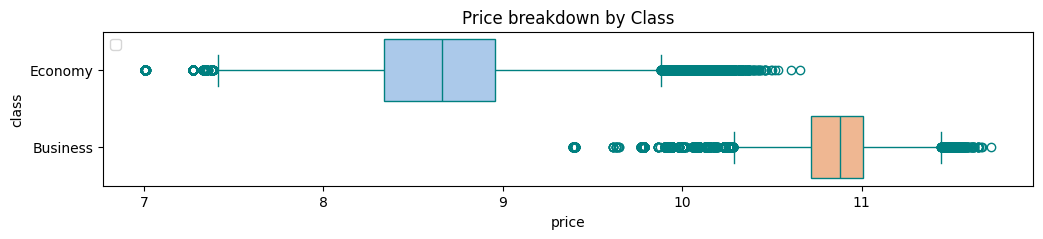

In [ ]:
# Visualize Class vs Price
bivariate_categorical(data=data, categoricals=['class'],
    target='price', hue='class', log_transform=True)

**Observation**:
+ **Class**:
    + Price distribution by class is symmetric for each class, with the business class distribution being flatter than its counterpart.
    + For the price distribution of the Economy class, we can apply feature transformation to reduce the shape of the distribution.

###### 2.2.3. Airlines vs Price Analysis

Feature name: AIRLINE


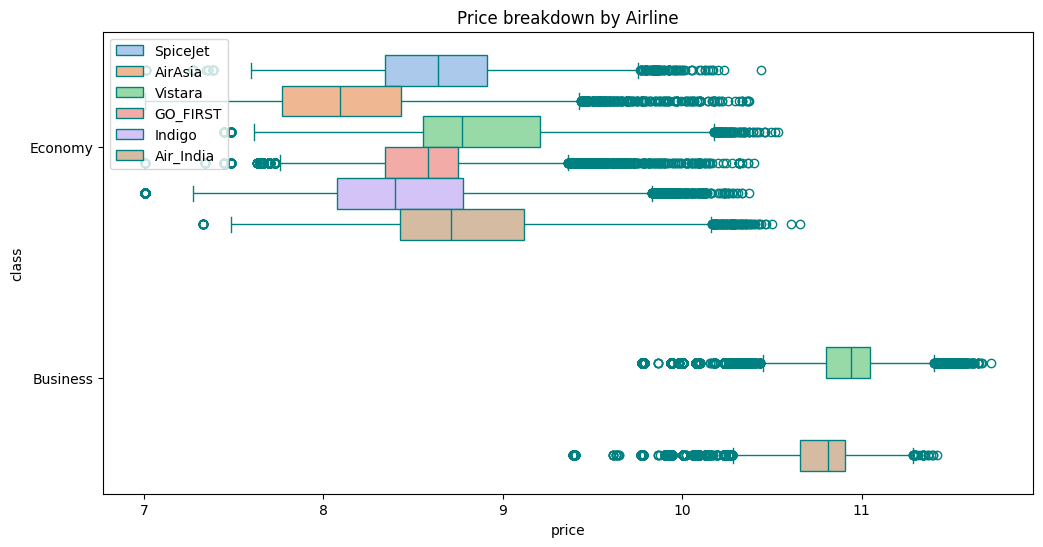

In [ ]:
# Visualize Airline vs Price
bivariate_categorical(data=data, categoricals=['airline'],
    target='price', hue='class', log_transform=True)

**Observation**:
+ **Airlines**:
    + Air India and Vistara had the widest price spread since they target both economy and business segments, while other airlines competed with others in the low-cost segment. Vistara commanded premium prices in both segments in comparison with its competitors.

###### 2.2.4. Source City vs Price Analysis

Feature name: SOURCE_CITY


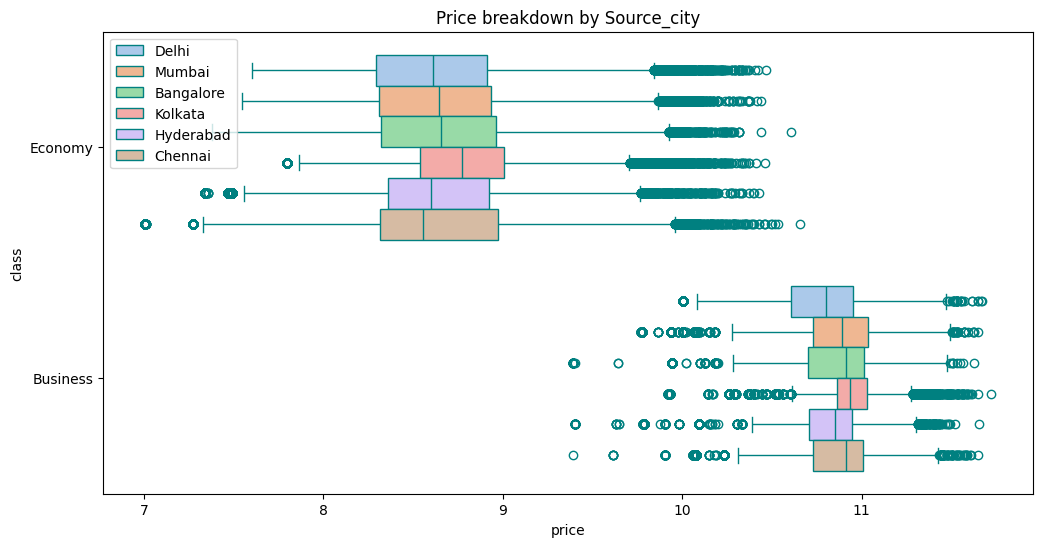

In [ ]:
# Visualize Source City vs Price
bivariate_categorical(data=data, categoricals=['source_city'],
    target='price', hue='class', log_transform=True)

###### 2.2.5. Destination City vs Price Analysis

Feature name: DESTINATION_CITY


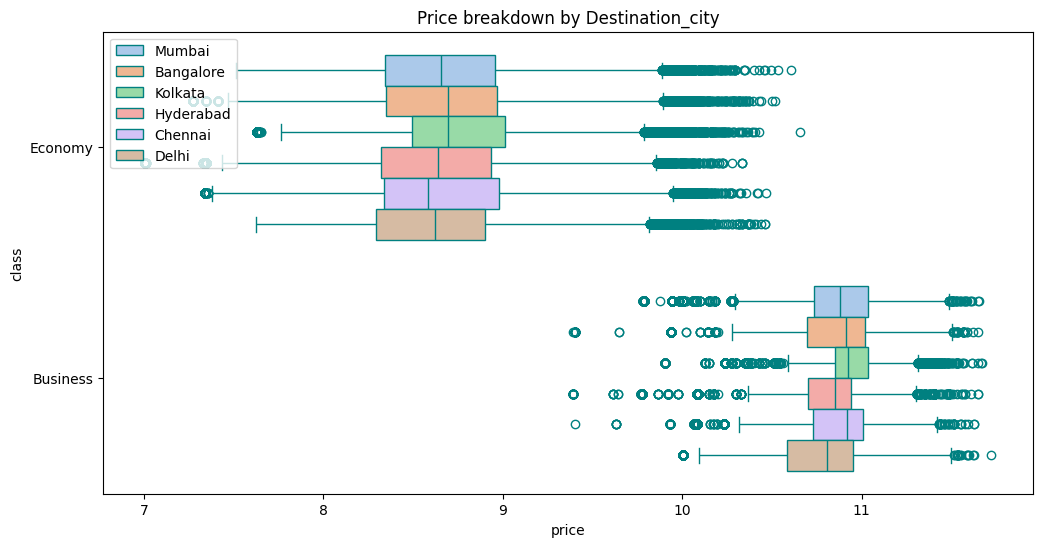

In [ ]:
# Visualize Destination City vs Price
bivariate_categorical(data=data, categoricals=['destination_city'],
    target='price', hue='class', log_transform=True)

**Observation**:
+ **Source city/ Destination city**:
    + Delhi had the smallest price range, which indicates that there is fierce competition in this market. Every airline tries to lower their prices to attract more passengers. In contrast, Kolkata had the highest price range; this could be because this market had higher income, more business passengers, and maybe under-served.

###### 2.2.6. Departure Time vs Price Analysis

Feature name: DEPARTURE_TIME


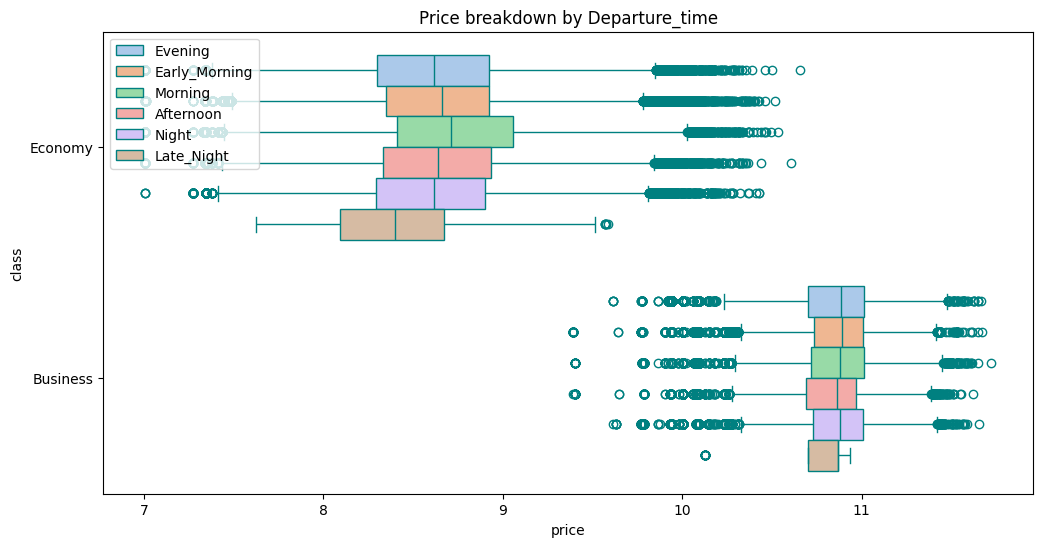

In [ ]:
# Visualize Departure Time vs Price
bivariate_categorical(data=data, categoricals=['departure_time'],
    target='price', hue='class', log_transform=True)

###### 2.2.7. Arrival Time vs Price Analysis

Feature name: ARRIVAL_TIME


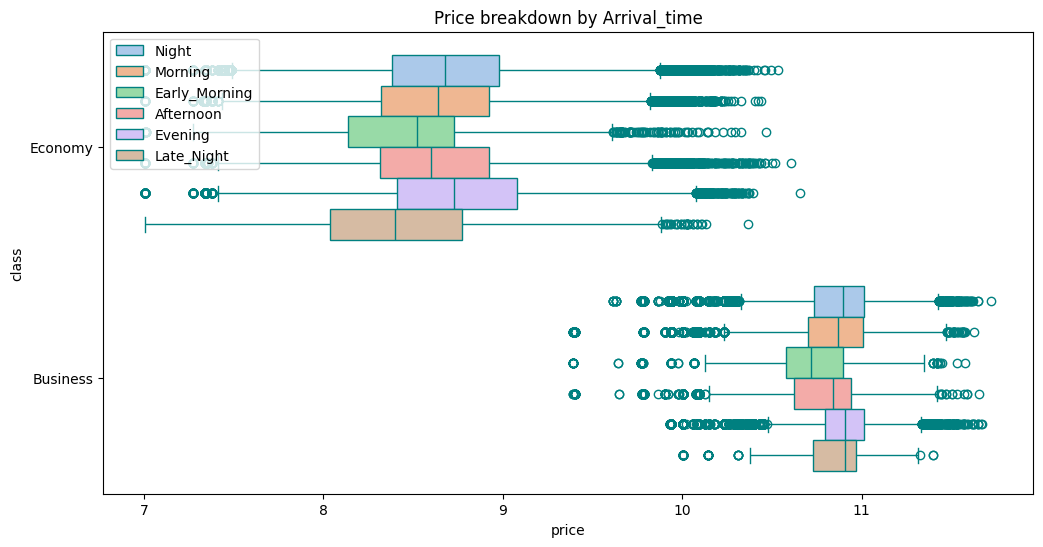

In [ ]:
# Visualize Arrival Time vs Price
bivariate_categorical(data=data, categoricals=['arrival_time'],
    target='price', hue='class', log_transform=True)

**Observation**:
+ **Departure time/ arrival time**:
    + Fligts that departed in the evening and night had a high chance of delay and cancellation; this could be because it added up delay times that they had in morning and afternoon flights.
<br>
<br>
    + Among departure times, flights that departed at noon normally had lower prices than other departure times, While night flights had the highest prices.

###### 2.2.8. Stops vs Price Analysis

Feature name: STOPS


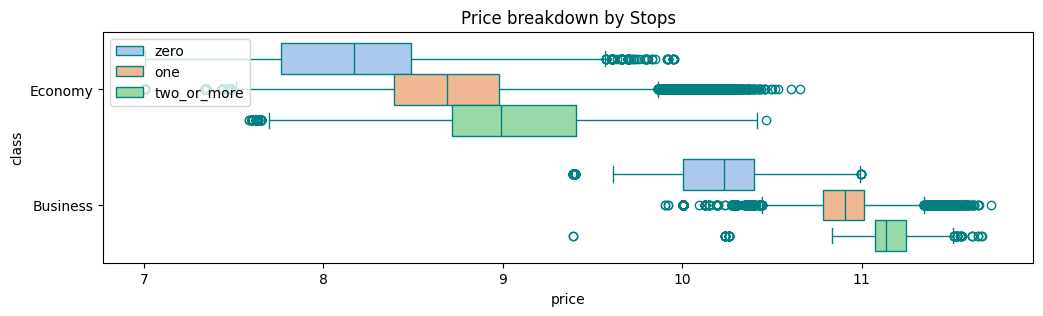

In [ ]:
# Visualize Stops vs Price
bivariate_categorical(data=data, categoricals=['stops'],
    target='price', hue='class', log_transform=True)

**Observation**:
+ **Stops**:
    + Flights with two or more stops had higher prices than direct flights or flights with one stop

<br>

### IV. Feature engineering

#### 1.. Generate New Features
**Create new features to improve the data interpretation**:
   + **Route**: the combination of Source City - Destination city
   + **Market**: the pair of routes Source City - Destination city and Destination city -Source City
   + **Average price by days left**

##### 1.1. Explore hidden structure with PCA

In [ ]:
# Define a function to plot 2D of the data
def plot_pca(data, drop_columns, hue=None, clustering=False, n_clusters=5, random_state=42, return_data=False):
  """
    data <dataframe>: dataframe to be visualized
    drop_columns <list>: list of column names to be dropped
  """
  # prepforcessing data
  from sklearn.preprocessing import MinMaxScaler
  mm_scaler = MinMaxScaler()
  datadum = pd.get_dummies(data.drop(columns=drop_columns))
  datadum = pd.DataFrame(data=mm_scaler.fit_transform(datadum),
                      columns= datadum.columns)

  # reduce the dimension of data
  from sklearn.decomposition import PCA
  pca = PCA(n_components=30)
  data_pca = pca.fit_transform(datadum)
  variance = pca.explained_variance_ratio_

  # Plot the unclustered data
  if clustering == False:

    if hue == None:
    # plot the 2D dimension of the data, without hue
      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,3))
      # scatter plot
      sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], ax=axes[0])
      # Explaination score
      # Calculate the compound variance
      current=0
      explain_compound=[]
      for i in range(len(variance)):
        explain_compound.append(current)
        current+=variance[i]
      # Plotting the compound explaination score
      example= np.array(explain_compound)
      sns.lineplot(example, ax=axes[1])
      sns.barplot(variance, ax=axes[1]).axhline(y=0.9, linestyle ='dashed')
      plt.show()


    else:
    # plot the 2D dimension of the data, with hue
      plt.figure(figsize=(4,4))
      sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=data[hue])
      plt.show()

    # return reduced dimension data
    if return_data == True:
      return data_pca, variance

  # Plot the clustered data
  else:
    # Use KMean to cluster the data
    from sklearn.cluster import KMeans
    kmean = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmean.fit(data_pca)
    labels = kmean.labels_
    # Plot clustered data
    sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels, palette='hls', alpha=0.8)
    plt.show()
    # return labels
    if return_data == True:
      return data_pca, labels

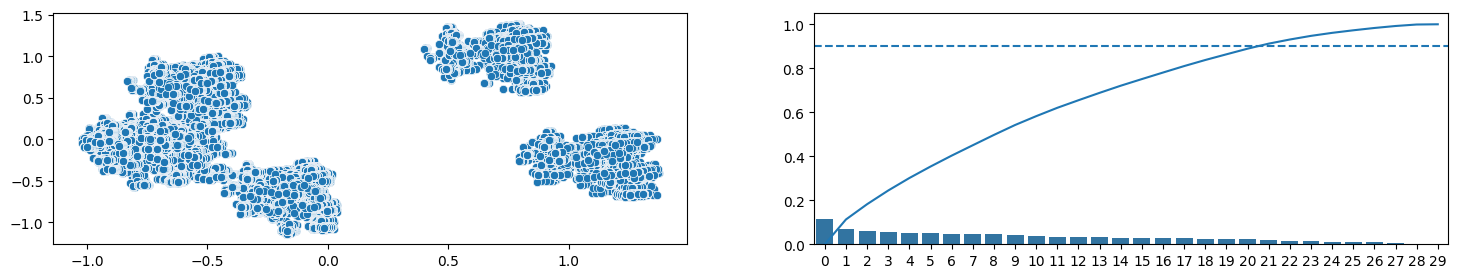

In [ ]:
# visualize the first 2 PCA components
plot_pca(data=data,
         drop_columns=['flight', 'duration'])

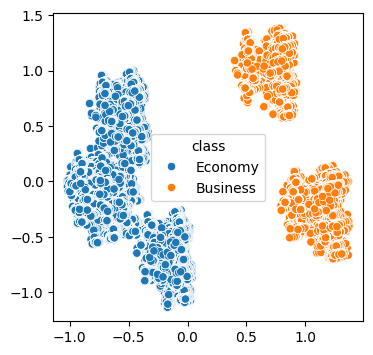

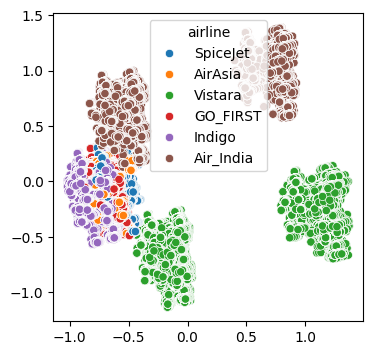

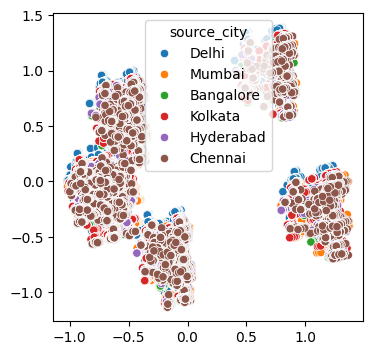

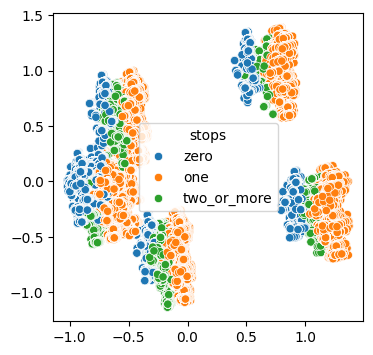

In [ ]:
# visualize PCA data with different categorical labels
hue_list=['class', 'airline', 'source_city', 'stops']
for i in range(len(hue_list)):
  plot_pca(
      data=data,
      drop_columns=['flight', 'duration'],
      hue = hue_list[i])

**Observation:**
 + there are no hidden structures in the data that cannot be explained using the current categorical labels.
 + The visualization gives a hint about how data should be grouped to build a machine-learning model to increase the accuracy of the prediction:
  + Economy segment:
    + AirIndia
    + Vistara
    + The remaining airlines
  + Business segment:
    + AirIndia
    + Vistara
    
+ Still, this implication should be taken with a grain of salt since the first 2 components explain 20% of the data

##### 1.2. Route & Market features

In [ ]:
# Create a function to create Route and Market features
def create_route_market_feature(data):
    # create route
    datadum=data.copy()
    datadum['route'] = datadum['source_city'] +'-'+ datadum['destination_city']

    # get unique city names
    city=datadum['source_city'].unique()

    # create dictionary for market names to match with route pairs
    market_dict={}
    for i in range(len(city)):
        for k in city[i+1:]:
            market='-'.join([city[i],k])
            route='-'.join([k,city[i]])
            market_dict[market]=market
            market_dict[route]=market
    # Create the market feature
    datadum['market']=datadum['route'].replace(market_dict)

    return datadum

In [ ]:
# apply the function to create a new feature
data_new=create_route_market_feature(data)

Feature name: MARKET


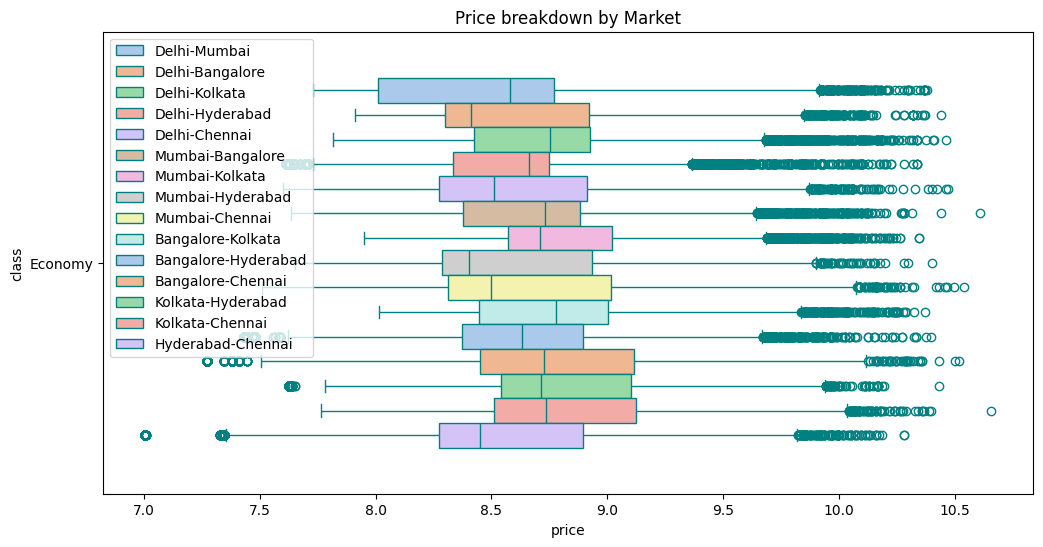

In [ ]:
# Visualize Stops vs Price for Economy class
bivariate_categorical(data=data_new[data_new['class']=='Economy'],
                      categoricals=['market'],
                      target='price',
                      hue='class',
                      log_transform=True,
                      height=6)

Feature name: MARKET


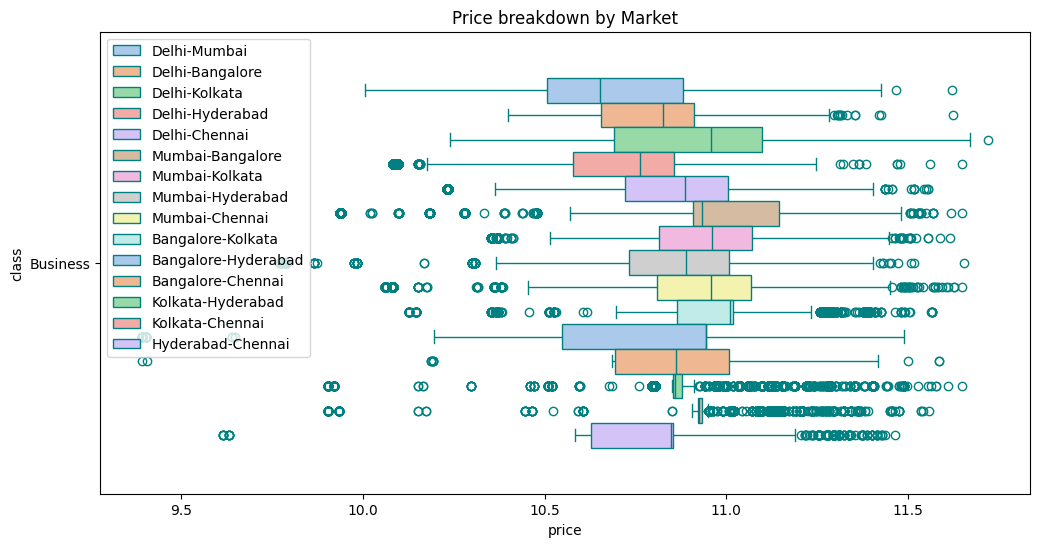

In [ ]:
# Visualize Stops vs Price for Business class
bivariate_categorical(data=data_new[data_new['class']=='Business'],
                      categoricals=['market'],
                      target='price',
                      hue='class',
                      log_transform=True,
                      height=6)

**Observations**:
+ Flights from/to the Delhi market have lower prices on average, while flights from Mumbai and Kolkata command better prices.
+ Flights from/to Chennai are more expensive than other city pairs.

##### **1.3. Average price by days left**

In [ ]:
# Define a function to plot the average price by day left
def plot_price_by_dayleft(data, label_name):
  """
    data <dataframe>: data to be visualized
    label_name <str>: name of the price line
  """
  # data preparation
  datadum=(data[['days_left', 'price']]
           .groupby('days_left')
           .mean()
           .reset_index()
           )
  # plot line
  sns.lineplot(datadum, x='days_left', y='price', label=label_name)

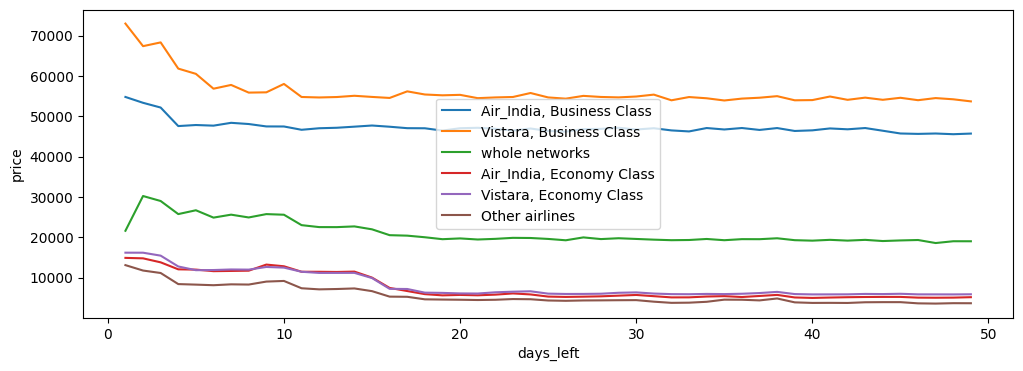

In [ ]:
# Plot the average price by day left
plt.figure(figsize=(12,4))
# for the Air_India business class
plot_price_by_dayleft(data=data.loc[data[['airline', 'class']].isin(['Air_India', 'Business']).all(axis=1)],
                      label_name='Air_India, Business Class')
# for the Vistara business class
plot_price_by_dayleft(data=data.loc[data[['airline', 'class']].isin(['Vistara', 'Business']).all(axis=1)],
                      label_name='Vistara, Business Class')
# for the whole network
plot_price_by_dayleft(data=data,
                      label_name='whole networks')
# for the Air_India Economy class
plot_price_by_dayleft(data=data.loc[data[['airline', 'class']].isin(['Air_India', 'Economy']).all(axis=1)],
                      label_name='Air_India, Economy Class')
# for the Vistara Economy class
plot_price_by_dayleft(data=data.loc[data[['airline', 'class']].isin(['Vistara', 'Economy']).all(axis=1)],
                      label_name='Vistara, Economy Class')
# for the remaining airlines
plot_price_by_dayleft(data=data.loc[data[['airline']].isin(['Indigo', 'GO_FIRST', 'AirAsia', 'Spicejet']).all(axis=1)],
                      label_name='Other airlines')
plt.show()

**Observations:**
+ The overall network's average price experiences a decline within one or two days leading up to the departure day. Interestingly, this trend diverges from the pattern observed when the data is segmented according to PCA suggestions. The discrepancy arises due to the tendency of the business class to sell out before the departure days.
+ Considering this, it might be advisable to develop separate machine learning models for each sub-group to enhance prediction accuracy.

I'd like to examine the variation in pricing patterns among routes within a specific subgroup, namely the Business and Economy class of Air India.

The Business Class

In [ ]:
# create a function to plot price pattern of the airline
def plot_price_pattern(data, airline_name, class_name):
  # data prep
  datadum=data.loc[data[['airline', 'class']].isin([airline_name, class_name]).all(axis=1)]
  # get first 5 routes
  list_of_market=datadum['market'].unique()[:5]
  # Plot the average price by day left
  plt.figure(figsize=(12,3))
  for market in list_of_market:
    plot_price_by_dayleft(data=datadum.loc[datadum[['market']].isin([market]).all(axis=1)],
                        label_name=market)
  plt.title(f"{airline_name} {class_name} Class")
  plt.show()

  # Visualize price distribution by market
  bivariate_categorical(data=datadum,
                        categoricals=['market'],
                        target='price',
                        hue='class',
                        log_transform=True,
                        height=3)


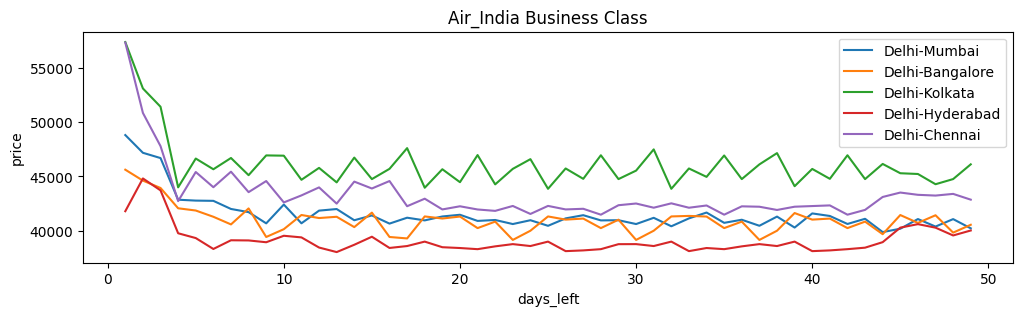

Feature name: MARKET


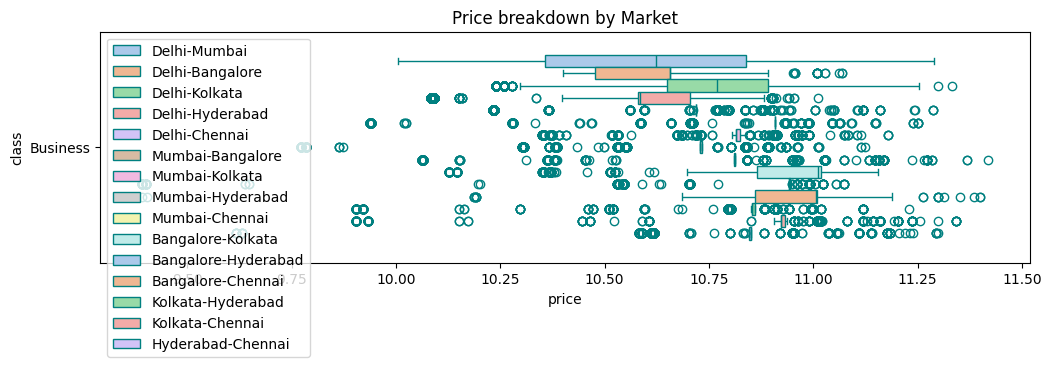

In [ ]:
# Plot the price pattern for Business class of Air India
plot_price_pattern(data=data_new,
                   airline_name='Air_India',
                   class_name='Business')

The Economy class

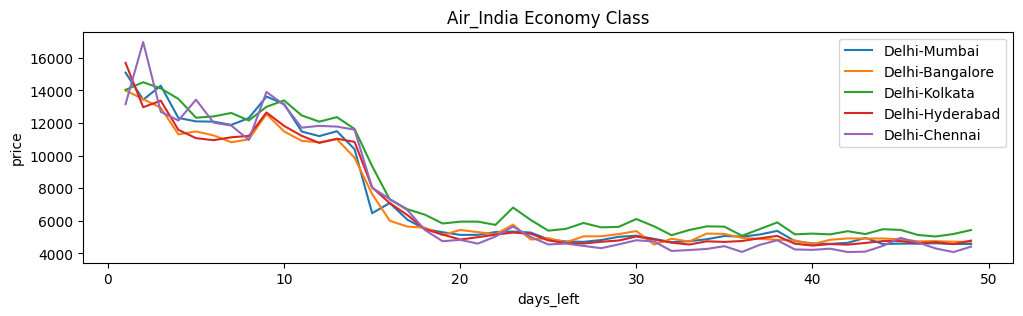

Feature name: MARKET


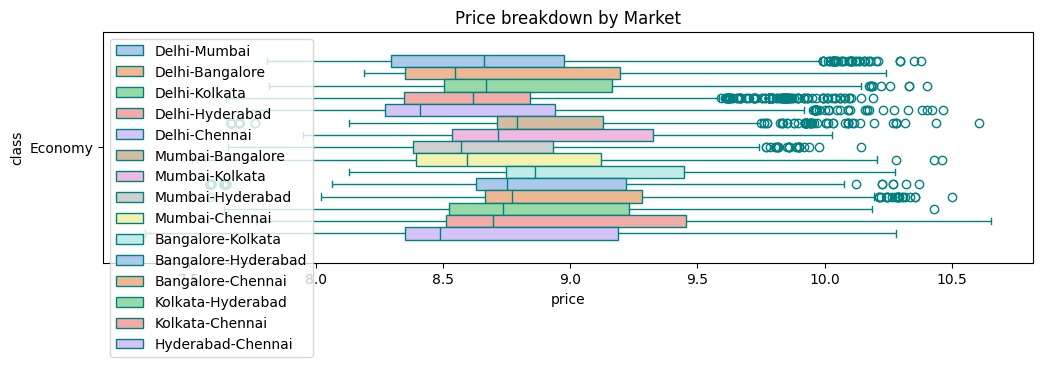

In [ ]:
# Plot the price pattern for Business class of Air India
plot_price_pattern(data=data_new,
                   airline_name='Air_India',
                   class_name='Economy')

**Observation:**
+ There is significant variability in price patterns across markets, particularly within the Business class. Developing individual predictions for each market within the PCA sub-group could enhance the accuracy of the model.

<br>

#### 2.. Feature selection


As mentioned earlier, I plan to remove the 'flight' and 'duration' features as they do not contribute meaningful information for predicting prices.

Additionally, I have chosen not to introduce new features for model training, as these additional features are primarily intended to enhance data interpretation, and the original features adequately convey the necessary information.

In [ ]:
# create a function to select features
def feature_selection(data):
  data_cleaned=data.drop(columns=['flight', 'duration'])
  return data_cleaned

# apply function to data
data_cleaned=feature_selection(data)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


#### 3.. Handeling Outliers

Although there are a lot of outliers in the price feature, I chose not to handle these outliers since it is the nature of the airline pricing algorithm to have the lowest price to fill the seats or to have a higher price to leverage the market's high demand.

#### 4.. Encoding categorical features

There are different ways to encode categorical data. For this project, I used label encoding method and one-hot encoding to prep data for machine learning model:
  + Label encoding: to enhance the interpretability when training the model
  + One-hot encoding: to understand the contribution of each category within a feature.

##### 4.1. Use Label Encoding

In [ ]:
def label_encoder(data, column_tobe_encoded, transform=False, encoder_name=None):
  """
    Parameter:
        data <dataframe>: the data
        column_tobe_encoded <string>: name of the column to be encoded
        transform <boolean>: set to true to transform data using a encoder
        encoder_name: name of the encoder
    Output:
        data, encoder: return dataframe and the encoder if transform set to False
        data: return dataframe if transform set to True
  """
  # load LabelEncoder and create encoder to encode the data
  datadum=data.copy()
  if transform == False:
    from sklearn.preprocessing import LabelEncoder
    encoder_name = LabelEncoder()
    result = encoder_name.fit_transform(datadum[column_tobe_encoded])
    datadum[column_tobe_encoded] = result
    return datadum, encoder_name

  # Use input encoder to encode data
  else:
    result = encoder_name.transform(datadum[column_tobe_encoded])
    datadum[column_tobe_encoded] = result
    return datadum

In [ ]:
# List of columns to be encoded
categoricals_list_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# encode the airline column
data_label_encoded, encoder_airline = label_encoder(data=data_cleaned, column_tobe_encoded='airline')
# encode the source_city column
data_label_encoded, encoder_source_city = label_encoder(data=data_label_encoded, column_tobe_encoded='source_city')
# encode the departure_time column
data_label_encoded, encoder_departure_time = label_encoder(data=data_label_encoded, column_tobe_encoded='departure_time')
# encode the stops
data_label_encoded, encoder_stops = label_encoder(data=data_label_encoded, column_tobe_encoded='stops')
# encode the arrival_time
data_label_encoded, encoder_arrival_time = label_encoder(data=data_label_encoded, column_tobe_encoded='arrival_time')
# encode the destination_city
data_label_encoded, encoder_destination_city = label_encoder(data=data_label_encoded, column_tobe_encoded='destination_city')
# encode the class
data_label_encoded, encoder_class = label_encoder(data=data_label_encoded, column_tobe_encoded='class')

# The result
data_label_encoded.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,4,2,2,2,5,5,1,1,5953
1,4,2,1,2,4,5,1,1,5953
2,0,2,1,2,1,5,1,1,5956
3,5,2,4,2,0,5,1,1,5955
4,5,2,4,2,4,5,1,1,5955


##### 4.2. Use One-hot encoding

In [ ]:
# define function to conduct one-hot encoding
def one_hot_encoder(data, categorical_columns, transform=False, encoder_name=None):
  """
    Parameter:
        data <dataframe>: the data
        categorical_columns <list>: list of name of the column to be encoded
        transform <boolean>: set to true to transform data using a encoder
        encoder_name: name of the encoder
    Output:
        data, encoder: return dataframe and the encoder if transform set to False
        data: return dataframe if transform set to True
  """
  # data preparation
  datadum=data[categorical_columns].copy()
  datadum2=data.drop(columns=categorical_columns).copy()
  if transform == False:
    # one hot encode data
    from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
    one_hot = OneHotEncoder(handle_unknown='ignore')
    result = one_hot.fit_transform(datadum)
    # convert the result to dataframe
    datadum=pd.DataFrame(result.toarray(),
                        columns=one_hot.get_feature_names_out(),
                         index=datadum.index)
    # return results
    result=pd.concat([datadum2, datadum], axis=1)
    return result, one_hot

  else:
    # transform data using given encoder
    result = encoder_name.fit_transform(datadum)
    # convert the result to dataframe
    datadum=pd.DataFrame(result.toarray(),
                        columns=encoder_name.get_feature_names_out(),
                         index=datadum.index)
    # return results
    result=pd.concat([datadum2, datadum], axis=1)
    return result

In [ ]:
# List of columns to be encoded
categoricals_list_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# One-hot encode the data
data_onehot_encoded, onehot_encoder = one_hot_encoder(data_cleaned, categoricals_list_encode)

# check the result
data_onehot_encoded.head(3)

,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### 5.. Feature Scaling

In [ ]:
def feature_scaling(data, scaled_target=True, target_name=None):
  """
    Parameters:
      data <dataframe> : the input data
      scaled_target <boolean> : whether to scale the target
      target_name <string> : the name of target column
    Output:
      data <dataframe> : scaled data
  """
  if scaled_target == True:
    datadum = data.copy()
  else:
    datadum = data.drop(columns=target_name).copy()

  from sklearn.preprocessing import MinMaxScaler
  minmax_scaler = MinMaxScaler()
  result = minmax_scaler.fit_transform(datadum)
  datadum = pd.DataFrame(result,
                         columns=datadum.columns,
                         index=datadum.index)
  if scaled_target == True:
    return datadum
  else:
    datadum[target_name]=data[target_name]
    return datadum

In [ ]:
data_label_scaled = feature_scaling(data_label_encoded, scaled_target=False, target_name='price')
data_label_scaled.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.0,5953
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.0,5953
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.0,5956


In [ ]:
data_onehot_scaled = feature_scaling(data_onehot_encoded, scaled_target=False, target_name='price')
data_onehot_scaled.head(3)

,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,...,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,price
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5953
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5953
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5956


### V. Machine Learning

#### 1.. Data Preparation

##### 1.1. Check for correlation

<Axes: >

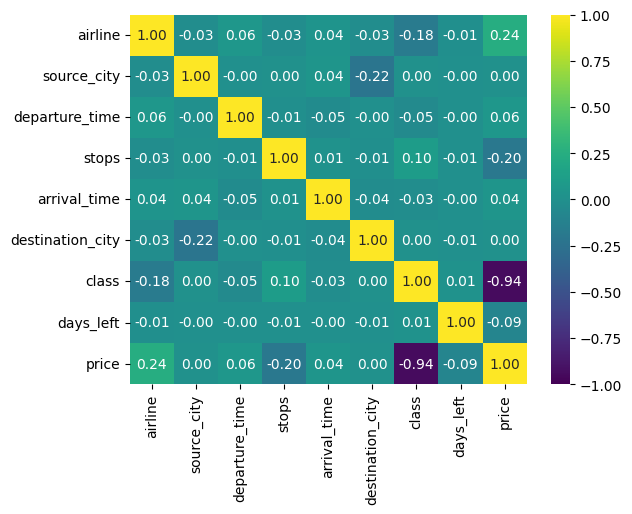

In [ ]:
sns.heatmap(data_label_scaled.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis")

**Observation:**
+ Notably, there exists a substantial correlation between the "class" and "price" variables, potentially leading the model to rely heavily on the "class" feature for predictions. Nevertheless, as previously stated, I plan to construct separate prediction models for each PCA subgroup. This approach aims to mitigate the influence of the "class" feature on the model's learning ability, allowing for more nuanced and accurate predictions within each subgroup.

##### 1.2. Split data

In [ ]:
def train_test_data_prep(data):
  """
    Parameters:
      data <dataframe> : input the data
    Output:
      [0] <dataframe>: data train
      [1] <dataframe>: data test
      [2] <dataframe>: X train
      [3] <dataframe>: y train
      [4] <dataframe>: X test
      [5] <dataframe>: y test
      [6] <dataframe>: data new train (for indexing purposes)
      [7] <dataframe>: data new test (for indexing purposes)
  """
  from sklearn.model_selection import train_test_split
  # generate data train and data test
  data_train, data_test = train_test_split(data, test_size=0.3, stratify=data['class'], random_state=42)
  # generate X_train and y_train
  X_train = data_train.drop(columns='price').copy()
  y_train = data_train['price'].copy()
  # generate X_test and y_test
  X_test = data_test.drop(columns='price').copy()
  y_test = data_test['price'].copy()
  # generate data_new_train and data_new_test for testing purpose
  data_new_train = data_new.iloc[data_train.index]
  data_new_test = data_new.iloc[data_test.index]
  return data_train, data_test, X_train, y_train, X_test, y_test, data_new_train, data_new_test

In [ ]:
# Split the data into subdata
data_splited = train_test_data_prep(data_label_scaled)
# Get the X_train, y_train, data_new_train subdata
data_train = data_splited[0]
data_test = data_splited[1]
X_train = data_splited[2]
y_train = data_splited[3]
data_new_train = data_splited[6]
data_new_test = data_splited[7]

##### 1.3. Check Normality of Target feature

In [ ]:
# Define a function to check whether the target data is normally distributed
def plot_check_normal_distribution(data, apply_log_transform=False, title=None):
  if apply_log_transform == True:
    data=np.log(data)
  # plot QQ plot
  from scipy import stats
  import pylab
  ax = stats.probplot(data, dist='norm', plot=pylab)

  # Shapiro test for normal distribution
  from scipy.stats import shapiro
  stat, p_value = shapiro(data)

  # Set customized title
  if title == None:
    pylab.title(f'Q-Q plot \n(Shapito test p_value={p_value:.2f})')
  else:
    pylab.title(f'Q-Q plot \n {title} \n(Shapito test, p_value={p_value:.2f})')
  return ax

In [ ]:
def plot_before_after_log_transform(data, filter_columns, filter_values):
  """
  Parameter:
    data <array|serries> : the data to be checked for normal distribution
    filter_columns <list of string> : the list of column names to be filtered
    filter_values <list of string> : the list of filtered values
  Output:
    None <plot figure>
  """
  # prepare data
  datadum = y_train[data_new_train[filter_columns].isin(filter_values).all(axis=1)]
  # Plot Q-Q plot without transformation
  fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,4))
  plt.subplot(2,2,1)
  plot_check_normal_distribution(datadum, apply_log_transform=False, title="Original data")
  # plot Kernel density estimation (kde) of the original data
  plt.subplot(2,2,3)
  sns.kdeplot(data=datadum, fill=True)
  # Plot Q-Q plot with transformation
  plt.subplot(2,2,2)
  plot_check_normal_distribution(datadum, apply_log_transform=True, title="Log transform")
  # plot Kernel density estimation (kde) of the log transform data
  plt.subplot(2,2,4)
  sns.kdeplot(data=np.log(datadum), fill=True)
  # Set title
  plt.suptitle(f"{', '.join(filter_values)}")
  plt.show()

**Group segments suggest by PCA:**
* Economy segment:
  + AirIndia
  + Vistara
  + The remaining airlines
* Business segment:
  + AirIndia
  + Vistara

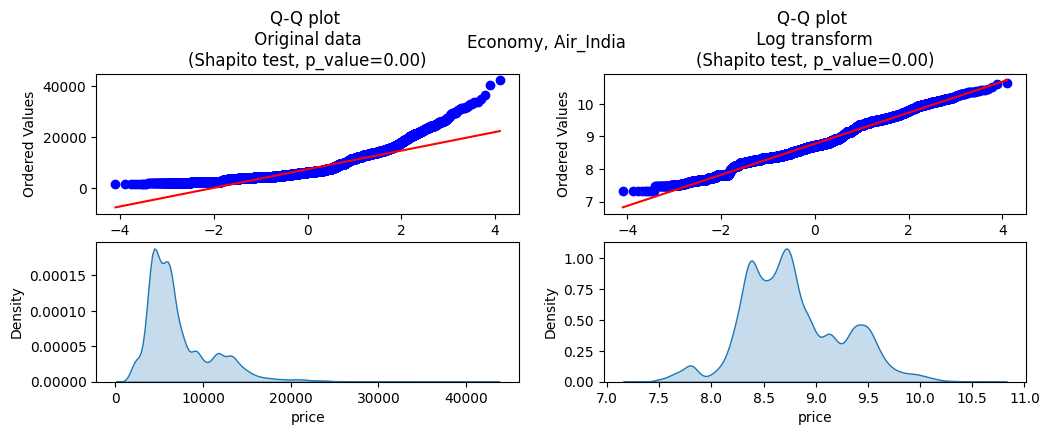

In [ ]:
# Plot segment: Economy - Air_India
plot_before_after_log_transform(data=y_train, filter_columns=['class', 'airline'], filter_values=['Economy', 'Air_India'])

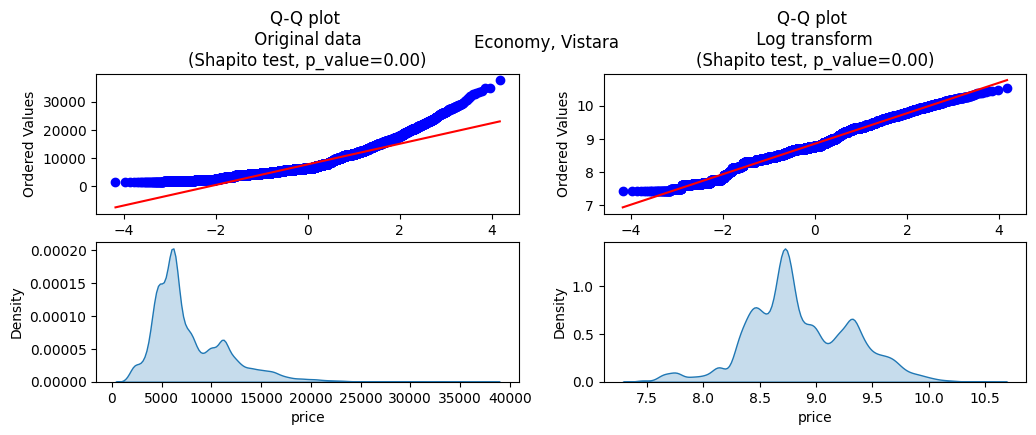

In [ ]:
# Plot segment: Economy - Vistara
plot_before_after_log_transform(data=y_train, filter_columns=['class', 'airline'], filter_values=['Economy', 'Vistara'])

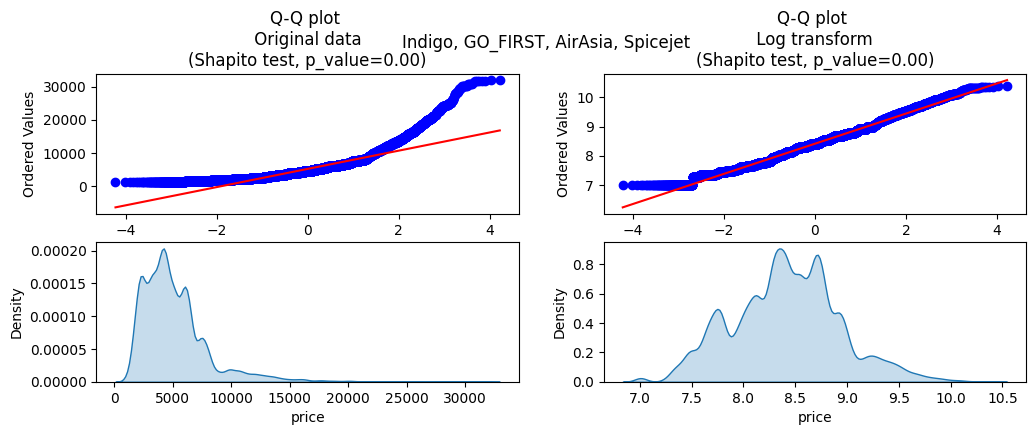

In [ ]:
# Plot segment: Economy - Remaining airlines
plot_before_after_log_transform(data=y_train, filter_columns=['airline'], filter_values=['Indigo', 'GO_FIRST', 'AirAsia', 'Spicejet'])

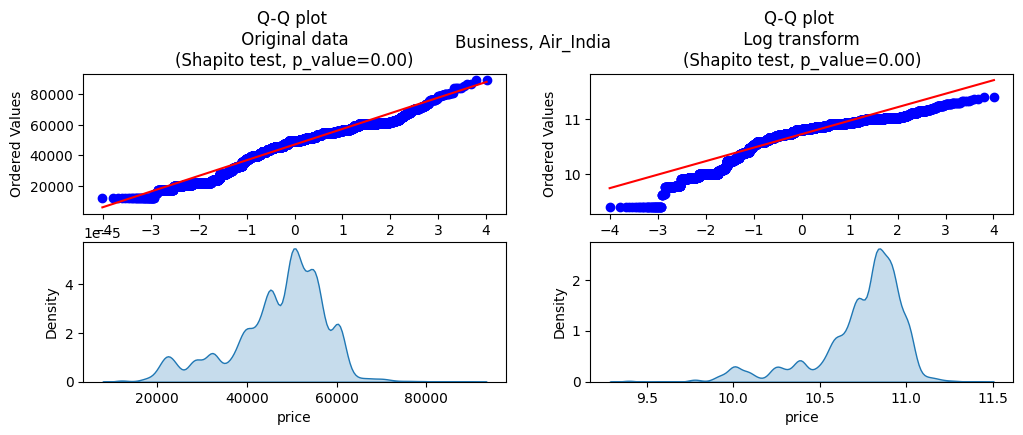

In [ ]:
# Plot segment: Business - Air_India
plot_before_after_log_transform(data=y_train, filter_columns=['class', 'airline'], filter_values=['Business', 'Air_India'])

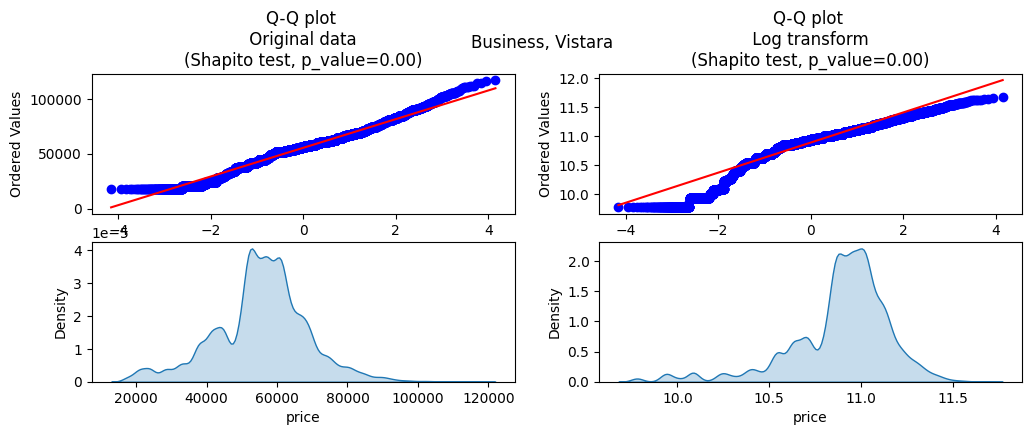

In [ ]:
# Plot segment: Business - Vistara
plot_before_after_log_transform(data=y_train, filter_columns=['class', 'airline'], filter_values=['Business', 'Vistara'])

Observations:
+ For Economy class, log transformation does help to reduce data skewness, while the original data for the Business class does look better without log transformation.

#### 2.. Prediction Model Development

##### 2.1. Ordinary Least Squares Model

In [ ]:
# Create a function to conduct Ordinary Least Squares regression
def ols_regression(data, index_data, target_column, filter_columns=None,
                   filter_values=None, drop_columns=None, log_transform=False,
                   print_result=False, residual_plots=False):
  """
    Parameters:
      data <dataframe> : data used to build model
      index_data <dataframe> : data_new used to index/ segment data
      filter_columns <list of string> : list of column names used to filter data
      filter_values <list of string> : list of filtered values
      drop_columns <list of string> : list of name of columns to be dropped
      log_transform <boolean> : whether to apply log transformation to target column
      print_result <boolean> : auto return the result of the OLS model
      residual_plots <boolean> : auto plot residual plot for each feature
    Output:
      model <ols model>
      <auto print> result of model if the print_result is set to True
  """
  # data preparation
  if filter_columns == None:
    datadum = data.copy()
  else:
    datadum=data[index_data[filter_columns].isin(filter_values).all(axis=1)].copy()
  # drop column
  if drop_columns != None:
    datadum=datadum.drop(columns=drop_columns).copy()
  # apply log transformation
  if log_transform == True:
    datadum[target_column]=np.log(datadum[target_column])
  # rename column "class" to "class_ticket" so the model doesn't misinterpret "class" with its internal function
  if 'class' in datadum.columns:
    datadum=datadum.rename(columns={'class':'class_'})

  # create statistic formula
  list_features = datadum.drop(columns=target_column).columns.to_list()
  formula = ' ~ '.join([target_column, ' + '.join(list_features)])

  # run model
  import statsmodels.formula.api as smf
  ols_model = smf.ols(formula=formula, data=datadum).fit()

  # print result
  if print_result == True:
    print(f'The model: {formula}\n\n')
    print(ols_model.summary())
    if log_transform == False:
      print(f'\n\n RMSE score: {np.sqrt(ols_model.mse_resid).round()}')
    else:
      from sklearn.metrics import mean_squared_error
      prediction = np.exp(ols_model.predict())
      mse_score = np.sqrt(mean_squared_error(np.exp(datadum[target_column]), prediction)).round(2)
      print(f'\n\n RMSE score: {mse_score}')

    # calculate VIF core
    # create customized model function
    print("\n\nVIF scores:")
    columns_name = datadum.drop(columns=target_column).columns
    for vif_target in columns_name:
      remaining_names = datadum.drop(columns=[vif_target, target_column]).columns
      str_model = ' ~ '.join([vif_target, " + ".join(remaining_names)])
      # calculate VIF score
      rsquare_dum = smf.ols(formula= str_model, data = datadum).fit().rsquared
      vif_score=(1/(1-rsquare_dum)).round(2)
      vif_name = 'VIF_' + vif_target
      print(vif_score, vif_name)

    # plot residual plot for target
    if residual_plots != True:
      print("\n\nResiduals Plot")
      sns.scatterplot(x=datadum[target_column], y=ols_model.resid)
      plt.title("Residuals vs. Fitted values")
      plt.ylabel("residuals")
      plt.show()

  # plot residuals for each features
  if residual_plots == True:
    for i in datadum.columns:
      plt.figure(figsize=(3,3))
      sns.scatterplot(x=datadum[i], y=ols_model.resid)
      plt.title("\n")
      plt.show()

  # return ols model
  return ols_model

###### 2.1.1. OLS with Train data

The model: price ~ airline + source_city + departure_time + stops + arrival_time + destination_city + class_ + days_left


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.478e+05
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:43:41   Log-Likelihood:            -2.1591e+06
No. Observations:              210107   AIC:                         4.318e+06
Df Residuals:                  210098   BIC:                         4.318e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

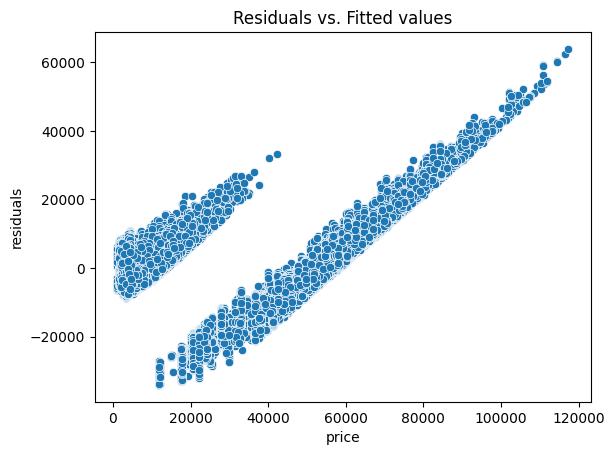

In [ ]:
# Apply OLS regression to train data, without log transformation
ols_regression(
    data = data_train,
    index_data = data_new_train,
    target_column = 'price',
    filter_columns = None,
    filter_values = None,
    drop_columns = None,
    log_transform = False,
    print_result = True,
)

The model: price ~ airline + source_city + departure_time + stops + arrival_time + destination_city + class_ + days_left


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.082e+05
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        03:43:44   Log-Likelihood:                -90672.
No. Observations:              210107   AIC:                         1.814e+05
Df Residuals:                  210098   BIC:                         1.815e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--

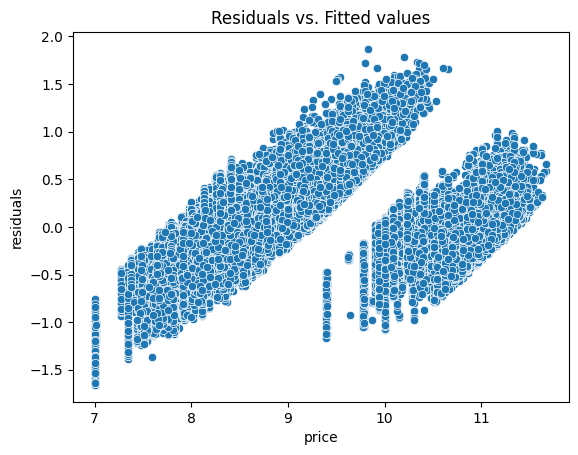

In [ ]:
# Apply OLS regression to train data, with log transformation
ols_regression(
    data = data_train,
    index_data = data_new_train,
    target_column = 'price',
    filter_columns = None,
    filter_values = None,
    drop_columns = None,
    log_transform = True, # Apply log transorm
    print_result = True
)

**Observations:**
+ The model can explain 90% of the data, with an RMSE of 7000.
+ All of the features contribute to predicting the flight price.
+ The residuals vs. fitted values plot reveals two different patterns in airline prices: economy class and business class.
+ There is no multicollinearity between features.
+ Although, the log transform help with Skew score and Kurtosis score, its overal performance is not good as comparing with the scenario without log transformation.

###### 2.1.2. OLS with PCA suggested groups

In [ ]:
def ols_model_experiments(data_train, data_index_train, scenarios_list, data_test, data_index_test):
  from sklearn.metrics import mean_squared_error, r2_score
  # output preparation
  experiments = []
  rsquared_train = []
  rmse_train = []
  rsquared_test = []
  rmse_test = []
  # run ols model for each senario
  for scenario_name, filter_columns, filter_values, drop_columns, log_transform in scenarios_list:
    ols_model= ols_regression(
                  data = data_train,
                  index_data= data_index_train,
                  target_column = 'price',
                  filter_columns = filter_columns,
                  filter_values = filter_values,
                  drop_columns = drop_columns,
                  log_transform = log_transform,
                  )

    # get R-Squared
    rsquare = ols_model.rsquared

    # train data preparation
    if filter_columns == None:
      datadum_train = data_train.copy()
    else:
      datadum_train=data_train[data_index_train[filter_columns].isin(filter_values).all(axis=1)].copy()

    # get residual mean squared error
    # for log transformation
    if log_transform == True:
      resid_mse = mean_squared_error(datadum_train['price'], np.exp(ols_model.predict())) ###
    # for original data
    else:
      resid_mse = ols_model.mse_resid

    # test result
    # data preparation
    data_test = data_test.rename(columns={'class':'class_'})
    if filter_columns == None:
      datadum_test = data_test.copy()
    else:
      datadum_test=data_test[data_index_test[filter_columns].isin(filter_values).all(axis=1)].copy()
    X_test = datadum_test.drop(columns='price').copy()
    y_test = datadum_test['price'].copy()
    # make prediction on test data
    if log_transform == True:
      test_prediction=np.exp(ols_model.predict(X_test))
    else:
      test_prediction=ols_model.predict(X_test)
    # calculate test R-Squared
    rsq_test = r2_score(y_test, test_prediction)
    # calculate rmse
    resid_mse_test = mean_squared_error(y_test, test_prediction)

    # output preparation
    experiments.append(scenario_name)
    rsquared_train.append(rsquare.round(2))
    rmse_train.append(np.sqrt(resid_mse).round(2))
    rsquared_test.append(rsq_test.round(2))
    rmse_test.append(np.sqrt(resid_mse_test).round(2))

  # get result
  dum={'Experiments':experiments, 'R-Squared (train)':rsquared_train, 'RMSE (train)':rmse_train,
       'R-Squared (test)':rsquared_test, 'RMSE (test)':rmse_test
       }

  result=pd.DataFrame(dum)

  return result


**Group segments suggest by PCA:**
* Economy segment:
  + AirIndia
  + Vistara
  + The remaining airlines
* Business segment:
  + AirIndia
  + Vistara

In [ ]:
# set up experiments
# <scenario_name>, <filter_columns>, <filter_values>, <drop_columns>, <log_transform>
scenarios = [
    ['All', None, None, None, False],
    ['Economy - AirIndia', ['class', 'airline'], ['Economy', 'Air_India'], ['class', 'airline'], False],
    ['Economy - Vistara', ['class', 'airline'], ['Economy', 'Vistara'], ['class', 'airline'], False],
    ['Economy - Other airlines', ['airline'], ['Indigo', 'GO_FIRST', 'AirAsia', 'Spicejet'], ['class'], False],
    ['Business - AirIndia', ['class', 'airline'], ['Business', 'Air_India'], ['class', 'airline'], False],
    ['Business - Vistara', ['class', 'airline'], ['Business', 'Vistara'], ['class', 'airline'], False],
             ]
# run scenarios
print(" Result without log transformation \n Filtered by: Class, Airline")
ols_model_experiments(data_train = data_train,
                      data_index_train = data_new_train,
                      scenarios_list = scenarios,
                      data_test = data_test,
                      data_index_test = data_new_test)

 Result without log transformation 
 Filtered by: Class, Airline


,Experiments,R-Squared (train),RMSE (train),R-Squared (test),RMSE (test)
0,All,0.90,7025.15,0.90,7055.77
1,Economy - AirIndia,0.44,2965.87,0.44,2997.40
2,Economy - Vistara,0.40,3009.25,0.39,2974.77
3,Economy - Other airlines,0.34,2456.27,0.35,2485.62
4,Business - AirIndia,0.44,7819.17,0.46,7775.32
5,Business - Vistara,0.36,10556.35,0.36,10644.37


**Observations:**
+ The performance of these groups was not as good as the network regarding the R-squared score. This is expected since the data is complex, with the first 2 PCA components explaining only 20% of the data.
+ Interestingly, the RMSE scores for "Economy - AirIndia", "Economy - Vistara", "Economy - Other airlines" are lower than that of the all network model. Predicting the price by route and airline group suggested by PCA might help increase accuracy and reduce the RMSE score.


###### 2.1.3. Apply OLS with each route

In [ ]:
# set up senarios
# <scenario_name>, <filter_columns>, <filter_values>, <drop_columns>, <log_transform>
scenarios = [
    ['Delhi-Mumbai', ['market'], ['Delhi-Mumbai'], None, False],
    ['Delhi-Bangalore', ['market'], ['Delhi-Bangalore'], None, False],
    ['Delhi-Kolkata', ['market'], ['Delhi-Kolkata'], None, False],
    ['Delhi-Hyderabad', ['market'], ['Delhi-Hyderabad'], None, False],
    ['Delhi-Chennai', ['market'], ['Delhi-Chennai'], None, False],

    ['Mumbai-Bangalore', ['market'], ['Mumbai-Bangalore'], None, False],
    ['Mumbai-Kolkata', ['market'], ['Mumbai-Kolkata'], None, False],
    ['Mumbai-Hyderabad', ['market'], ['Mumbai-Hyderabad'], None, False],
    ['Mumbai-Chennai', ['market'], ['Mumbai-Chennai'], None, False],
    ['Bangalore-Kolkata', ['market'], ['Bangalore-Kolkata'], None, False],

    ['Bangalore-Hyderabad', ['market'], ['Bangalore-Hyderabad'], None, False],
    ['Bangalore-Chennai', ['market'], ['Bangalore-Chennai'], None, False],
    ['Kolkata-Hyderabad', ['market'], ['Kolkata-Hyderabad'], None, False],
    ['DKolkata-Chennai', ['market'], ['Kolkata-Chennai'], None, False],
    ['Hyderabad-Chennai', ['market'], ['Hyderabad-Chennai'], None, False],
    ]
# run scenarios
print(" Result without log transformation \n Filtered by: Market")
ols_model_experiments(data_train = data_train,
                      data_index_train = data_new_train,
                      scenarios_list = scenarios,
                      data_test=data_test,
                      data_index_test=data_new_test)

 Result without log transformation 
 Filtered by: Market


,Experiments,R-Squared (train),RMSE (train),R-Squared (test),RMSE (test)
0,Delhi-Mumbai,0.89,6540.71,0.89,6536.70
1,Delhi-Bangalore,0.93,5253.22,0.93,5140.52
2,Delhi-Kolkata,0.90,7369.83,0.90,7390.61
3,Delhi-Hyderabad,0.92,5281.11,0.92,5294.45
4,Delhi-Chennai,0.92,6132.48,0.92,6306.01
5,Mumbai-Bangalore,0.91,7856.51,0.91,7931.30
6,Mumbai-Kolkata,0.93,6172.73,0.93,6119.16
7,Mumbai-Hyderabad,0.92,6416.79,0.92,6420.91
8,Mumbai-Chennai,0.91,7564.18,0.90,7631.82
9,Bangalore-Kolkata,0.95,5399.02,0.95,5552.07


In [ ]:
# set up senarios
# <scenario_name>, <filter_columns>, <filter_values>, <drop_columns>, <log_transform>
scenarios = [
    ['Delhi-Mumbai', ['market', 'class'], ['Delhi-Mumbai', 'Economy'], None, False],
    ['Delhi-Bangalore', ['market', 'class'], ['Delhi-Bangalore', 'Economy'], None, False],
    ['Delhi-Kolkata', ['market', 'class'], ['Delhi-Kolkata', 'Economy'], None, False],
    ['Delhi-Hyderabad', ['market', 'class'], ['Delhi-Hyderabad', 'Economy'], None, False],
    ['Delhi-Chennai', ['market', 'class'], ['Delhi-Chennai', 'Economy'], None, False],

    ['Mumbai-Bangalore', ['market', 'class'], ['Mumbai-Bangalore', 'Economy'], None, False],
    ['Mumbai-Kolkata', ['market', 'class'], ['Mumbai-Kolkata', 'Economy'], None, False],
    ['Mumbai-Hyderabad', ['market', 'class'], ['Mumbai-Hyderabad', 'Economy'], None, False],
    ['Mumbai-Chennai', ['market', 'class'], ['Mumbai-Chennai', 'Economy'], None, False],
    ['Bangalore-Kolkata', ['market', 'class'], ['Bangalore-Kolkata', 'Economy'], None, False],

    ['Bangalore-Hyderabad', ['market', 'class'], ['Bangalore-Hyderabad', 'Economy'], None, False],
    ['Bangalore-Chennai', ['market', 'class'], ['Bangalore-Chennai', 'Economy'], None, False],
    ['Kolkata-Hyderabad', ['market', 'class'], ['Kolkata-Hyderabad', 'Economy'], None, False],
    ['DKolkata-Chennai', ['market', 'class'], ['Kolkata-Chennai', 'Economy'], None, False],
    ['Hyderabad-Chennai', ['market', 'class'], ['Hyderabad-Chennai', 'Economy'], None, False],
    ]
# run scenarios
print(" Result without log transformation \n Filtered by: Market, Class")
ols_model_experiments(data_train = data_train,
                      data_index_train = data_new_train,
                      scenarios_list = scenarios,
                      data_test=data_test,
                      data_index_test=data_new_test)

 Result without log transformation 
 Filtered by: Market, Class


,Experiments,R-Squared (train),RMSE (train),R-Squared (test),RMSE (test)
0,Delhi-Mumbai,0.45,2857.00,0.45,2747.82
1,Delhi-Bangalore,0.41,2663.34,0.41,2668.29
2,Delhi-Kolkata,0.41,2880.64,0.42,2851.22
3,Delhi-Hyderabad,0.46,2362.88,0.46,2394.86
4,Delhi-Chennai,0.41,2696.78,0.39,2813.96
5,Mumbai-Bangalore,0.40,2680.23,0.37,2791.14
6,Mumbai-Kolkata,0.42,2575.71,0.39,2681.69
7,Mumbai-Hyderabad,0.36,2560.15,0.37,2544.31
8,Mumbai-Chennai,0.46,3024.88,0.45,3127.71
9,Bangalore-Kolkata,0.38,2989.04,0.38,2949.30


**Observations:**
+ The models for markets have high R-squared scores and RMSE scores, while the models for the economy class of these markets have lower R-squared scores and RMSE scores. This implies complex data, which could be solved using polynomial regression or other regression algorithms.

<br>

##### 2.2. Machine learning models

###### 2.2.1. Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data preparation
X_train = data_splited[2]
y_train = data_splited[3]
X_test = data_splited[4]
y_test = data_splited[5]

# Apply polynomial transformation
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on the training set
y_train_pred = lin_reg.predict(X_train_poly)

# Predict on the test set
y_test_pred = lin_reg.predict(X_test_poly)

# Evaluate the model
rsquare_train=r2_score(y_train, y_train_pred)
mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rsquare_test=r2_score(y_test, y_test_pred)
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"R-Squared score on Training set: {rsquare_train:.2f}")
print(f"Mean Squared Error on Training Set: {mse_train:.2f}")
print(f"R-Squared score on Test set: {rsquare_test:.2f}")
print(f"Mean Squared Error on Test Set: {mse_test:.2f}")


R-Squared score on Training set: 0.94
Mean Squared Error on Training Set: 5729.19
R-Squared score on Test set: 0.94
Mean Squared Error on Test Set: 5742.87


**Observations:**
+ The polynomial approach does help to increase the R-Squared score and the RMSE score for the price prediction.
+ I'm going to explore other Regression algorithms to identify opportunities for improvement.

###### 2.2.2. Other Algorithms

In [ ]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import r2_score,mean_squared_error

# Prepare models
lso=Lasso(random_state=42)
rig=Ridge(random_state=42)
kn_reg=KNeighborsRegressor()
dt_reg=DecisionTreeRegressor(random_state=42)
rdf_reg=RandomForestRegressor(random_state=42)
xgbr=xgb.XGBRegressor(random_state=42)
lgbr=lgb.LGBMRegressor(random_state=40)
# Create a list of model
models=[lso, rig, kn_reg, dt_reg, rdf_reg, xgbr, lgbr]
# Fit model and generate results
for model in models:
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test, prediction)).round(2)
    rsquared=r2_score(y_test, prediction).round(2)
    print(model, ' model')
    print('R-Squared on test data: ', rsquared)
    print('RMSE on test data: ', rmse)
    print('*************')

Lasso(random_state=42)  model
R-Squared on test data:  0.9
RMSE on test data:  7055.76
*************
Ridge(random_state=42)  model
R-Squared on test data:  0.9
RMSE on test data:  7055.77
*************
KNeighborsRegressor()  model
R-Squared on test data:  0.96
RMSE on test data:  4254.91
*************
DecisionTreeRegressor(random_state=42)  model
R-Squared on test data:  0.95
RMSE on test data:  4929.87
*************
RandomForestRegressor(random_state=42)  model
R-Squared on test data:  0.96
RMSE on test data:  4430.98
*************
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_

Observations:
+ XGBRegressor model perform the best. However, tuning the XGBRegressor will take time and resources. I am going to conduct hyperparameter tunning to enhance the LightGBM model performance

###### 2.2.3. XGBoost Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# generate perameter grid
param_grid={
    'num_leaves': [140, 150, 160],
            'max_depth': [9, 10,11,12],
            'learning_rate': [0.1, 0.3, 0.5]
    }

# Create grid search object
grid_search=GridSearchCV(estimator=lgb.LGBMRegressor(),
                        param_grid=param_grid,
                        cv=3 # set cross-validation with 3 folds
                         )
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 140071, number of used features: 8
[LightGBM] [Info] Start training from score 20941.465878
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 140071, number of used features: 8
[LightGBM] [Info] Start training from score 20877.544610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tota

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [9, 10, 11, 12],
                         'num_leaves': [140, 150, 160]})

In [ ]:
best_params=grid_search.best_params_
print(best_params)

{'learning_rate': 0.3, 'max_depth': 11, 'num_leaves': 140}


In [ ]:
tuned_lgbm=lgb.LGBMRegressor()
tuned_lgbm.set_params(**best_params)

tuned_lgbm.fit(X_train, y_train)
prediction=tuned_lgbm.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, prediction)).round(2)
rsquared=r2_score(y_test, prediction).round(2)
print(tuned_lgbm, ' model')
print('R-Squared on test data: ', rsquared)
print('RMSE on test data: ', rmse)
print('*************')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 210107, number of used features: 8
[LightGBM] [Info] Start training from score 20887.617343
LGBMRegressor(learning_rate=0.3, max_depth=11, num_leaves=140)  model
R-Squared on test data:  0.97
RMSE on test data:  3865.07
*************


###### 2.2.4. Performance Evaluation

KFold validation

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 208005, number of used features: 8
[LightGBM] [Info] Start training from score 20894.935372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 208005, number of used features: 8
[LightGBM] [Info] Start training from score 20884.221394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

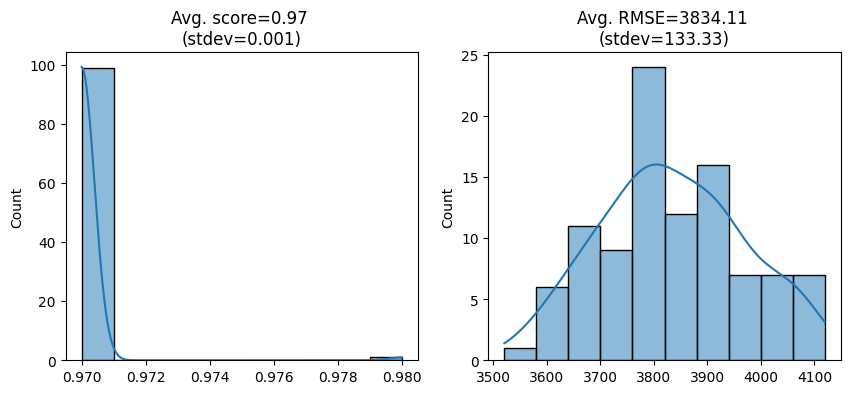

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=100, shuffle=True, random_state=42)

model=lgb.LGBMRegressor()
model.set_params(**best_params)

cv_scores=[]
cv_rmse=[]

for train_index, valid_index in kf.split(X_train):
    # Generate train and validation data
    x_train_sub, y_train_sub=X_train.iloc[train_index], y_train.iloc[train_index]
    x_valid, y_valid=X_train.iloc[valid_index], y_train.iloc[valid_index]
    # Train model
    model.fit(x_train_sub, y_train_sub)
    # Made prediction
    y_pred=model.predict(x_valid)
    # Save score
    cv_scores.append(model.score(x_valid, y_valid).round(2))
    # Save RMSE
    cv_rmse.append(np.sqrt(mean_squared_error(y_valid,y_pred)).round(2))

plt.subplots(1,2,figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(cv_scores, bins=10, kde=True)
plt.title(f'Avg. score={np.mean(cv_scores).round(3)} \n(stdev={np.std(cv_scores).round(3)})')
plt.subplot(1,2,2)
sns.histplot(cv_rmse, bins=10, kde=True)
plt.title(f'Avg. RMSE={np.mean(cv_rmse).round(2)} \n(stdev={np.std(cv_rmse).round(2)})')
plt.show()

## End